**Pravila pridruživanja** predstavljaju tehniku u oblasti istrazivanja podataka koja se koristi za otkrivanje zanimljivih veza, učestalih obrazaca, asocijacija ili korelacija između promenljivih u velikim skupovima podataka. Ova tehnika je široko primenjena u različitim oblastima, poput analize potrosacke korpe, analize upotrebe veb sajtova, bioinformatike i drugih. Osnovna ideja je identifikacija pravila koja predviđaju pojavu jednog elementa na osnovu prisustva drugih elemenata u transakciji. Ova pravila su izražena u obliku "Ako-Onda" iskaza, najčešće zapisana kao {X} → {Y}, gde su X i Y različiti skupovi stavki, npr. pravilo poput {Pelene} → {Vlažne maramice} sugeriše da, u transakcijama gde se kupuju pelene, postoji velika verovatnoća da će se kupiti i vlažne maramice.

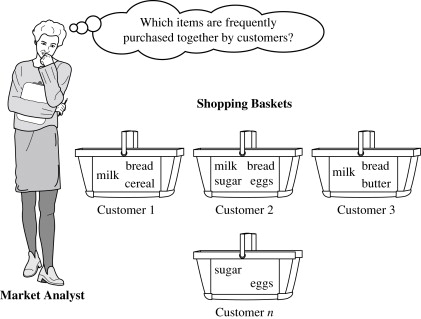

Koja pravila pridruživanja se mogu zaključiti sa slike?

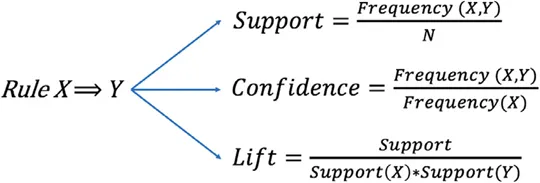

* **Podrška (Support)**: Ova mera pokazuje koliko često se skup stavki (i X i Y zajedno) pojavljuje u skupu podataka. Izračunava se kao udeo transakcija koje sadrže i X i Y u odnosu na ukupan broj transakcija. Visoka podrška ukazuje na to da su ove stavke česte u transakcijama.

* **Poverenje (Confidence)**: Ova mera pokazuje verovatnoću pronalaženja posledice u transakcijama pod uslovom da te transakcije takođe sadrže prethodnik. U pravilu {X} → {Y}, poverenje meri koliko često se Y pojavljuje kada je X prisutan.

* **Lift**: Ova mera pokazuje koliko se češće prethodnik i posledica pravila pojavljuju zajedno nego što bismo očekivali da su statistički nezavisni (meri snagu asocijacije između X i Y). Vrednost lift-a veća od 1 ukazuje na zavisnost između prethodnika i posledice. Lift procenjuje snagu pravila u odnosu na slučajnost — lift veći od 1 označava jako pravilo.

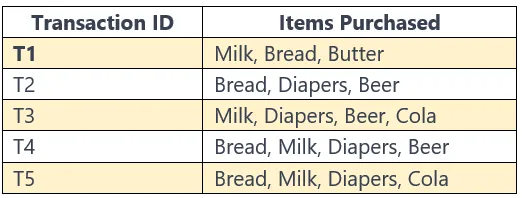

Primer 1.

Pravilo: **{Bread} →{Milk}**

Interpretacija pravila: Kupci koji kupuju hleb vrlo verovatno kupuju i mleko.

Izračunati pomenute metrike.

* Support - 3 transakcije sadrze i mleko i hleb. Ukupna broj transakcija je 5 => podrska ovog pravila je 3/5 = 60%

* Confidence - 3 transakcije koje sadrze i mleko i hleb. 4 transakcije koje sadrze hleb => poverenje ovog pravila je 3/4=75%

* Lift - $\frac{Support(Bread,Milk)}{Support(Bread)*Support(Milk)}=\frac{0.6}{0.8*0.8}=0.93$




Koliki confidence score bi bio za pravilo {Toothbrush} → {Milk}? Ukoliko je mleko učestala namirnica u potrošačkim korpama, onda će confidence ovog pravila biti visok.



> It does not matter what you have in the antecedent for such a frequent consequent. The confidence for an association rule having a very frequent consequent will always be high.



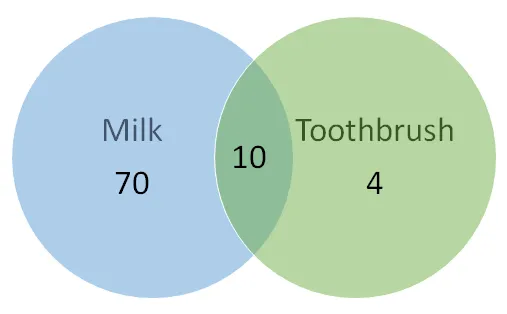

U ovom slučaju će confidence biti 0.7. Međutim, intuitivno znamo da ova dva proizvoda imaju slabiju povezanost, pa postoji nešto obmanjujuće u vezi sa ovom visokom vrednošću poverenja. Lift je uveden kako bi se prevazišao ovaj izazov.

Verovatnoća da se mleko nađe na korpi bez ikakvog znanja o četkici za zube:
80 / 100 = 0.8. Ovi brojevi pokazuju da prisustvo četkice za zube u korpi zapravo smanjuje verovatnoću da će mleko biti u korpi sa 0.8 na 0.7. Lift vrednost je 0.7 / 0.8 = 0.87, sto je već realnija slika.

Vrednost lifta manja od 1 pokazuje da prisustvo četkice za zube na korpi ne povećava šanse da mleko bude na korpi, uprkos tome što pravilo pokazuje visoko poverenje. Vrednost lifta veća od 1 potvrđuje visoku povezanost između {Y} i {X}. Što je veća vrednost lifta, veće su šanse da će kupac kupiti {Y} ako je već kupio {X}.

Pravila pridruživanja se mogu generisati na osnovu učestalih skupova stavki koristeći sledeći postupak:

1) **Identifikacija učestalih skupova stavki**:
Prvi korak u generisanju pravila pridruživanja je dobijanje svih čestih skupova stavki na kojima se mogu izvršiti binarne podele kako bi se dobio antecedent i konsekvent. Na primer, ako postoji 6 stavki {Hleb, Maslac, Jaje, Mleko, Sveska, Četkica za zube} u svim transakcijama, skupovi stavki mogu izgledati ovako: {Hleb}, {Maslac}, {Hleb, Sveska}, {Mleko, Četkica za zube}, {Mleko, Jaje, Povrće} itd. Veličina skupova stavki može varirati od jednog do ukupnog broja stavki koje imamo. Sada, tražimo samo česte skupove stavki iz ovoga, a ne sve, kako bismo ograničili broj ukupno generisanih skupova stavki.

Česti skupovi stavki su oni koji se pojavljuju barem određeni broj puta u transakcijama. Tehnički, ovo su skupovi stavki za koje je vrednost podrške iznad minimalnog praga — minsup. Moguce je izgenerisati sve moguce skupove, ali to bi bilo racunski zahtevno, pa se generisanje vrsi po Apriori principu:



>Svi podskupovi čestog skupa stavki moraju takođe biti česti.

Ukoliko podskup nije cest, onda nece biti ni njegov nadskup - Apriori algoritam


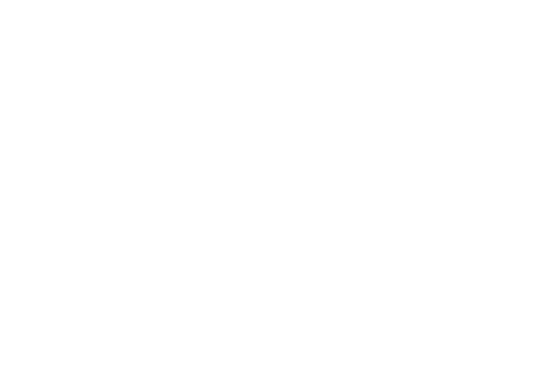

2) **Generisanje pravila pridruživanja**:
Na osnovu učestalih skupova stavki, generišu se pravila pridruživanja u obliku "Ako X, onda Y". Svako pravilo se formira iz skupa stavki na sledeći način:
Učestali skup stavki se deli na dva dela: prethodnik (X) i posledicu (Y).
Na primer, ako imamo učestali skup stavki {Mleko, Hleb}, možemo formirati dva pravila: {Mleko} → {Hleb} i {Hleb} → {Mleko}.

3) **Izračunavanje poverenja i drugih metrika**:
Za svako generisano pravilo pridruživanja, izračunaju se metrike kao što su poverenje, lift i podrška kako bi se procenila snagu i relevantnost pravila.

4) **Filtriranje pravila**:
Filtrirajte pravila koja ne zadovoljavaju minimalne pragove poverenja i lift-a. Na primer, pravila sa niskim poverenjem ili lift-om manjim od 1 mogu se smatrati manje korisnim.

In [3]:
!pip install apyori
from apyori import apriori
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e4ab58a3197a1034cd21e707e9dbcb16a21085c24c0c4938c981a5f2ac03bc45
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
data = pd.read_csv('Grocery Products Purchase.csv')

In [5]:
data

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
transactions = []
for index, row in data.iterrows():
    items = [x for x in row.values if isinstance(x, str)]
    transactions.append(items)

In [7]:
transactions[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

In [8]:
len(transactions)

9835

In [13]:
res = apriori(transactions, min_support=0.01, min_confidence=0.4, min_lift=2)
for record in res:
#     print(record)
    if len(record.items) > 1:
        base = list(record.ordered_statistics[0].items_base)
        items = list(record.ordered_statistics[0].items_add)
        support = round(record.support * 100, 2)
        confidence = round(record.ordered_statistics[0].confidence * 100, 2)
        lift = round(record.ordered_statistics[0].lift, 2)

        print(f'{", ".join(base)} => {", ".join(items)}[S={support}%, C={confidence}%, L={lift}]')

chicken => other vegetables[S=1.79%, C=41.71%, L=2.16]
hamburger meat => other vegetables[S=1.38%, C=41.59%, L=2.15]
onions => other vegetables[S=1.42%, C=45.9%, L=2.37]
root vegetables => other vegetables[S=4.74%, C=43.47%, L=2.25]
whipped/sour cream => other vegetables[S=2.89%, C=40.28%, L=2.08]
other vegetables, butter => whole milk[S=1.15%, C=57.36%, L=2.24]
citrus fruit, root vegetables => other vegetables[S=1.04%, C=58.62%, L=3.03]
citrus fruit, whole milk => other vegetables[S=1.3%, C=42.67%, L=2.21]
yogurt, curd => whole milk[S=1.01%, C=58.24%, L=2.28]
domestic eggs, other vegetables => whole milk[S=1.23%, C=55.25%, L=2.16]
other vegetables, pip fruit => whole milk[S=1.35%, C=51.75%, L=2.03]
pork, whole milk => other vegetables[S=1.02%, C=45.87%, L=2.37]
root vegetables, rolls/buns => other vegetables[S=1.22%, C=50.21%, L=2.59]
root vegetables, tropical fruit => other vegetables[S=1.23%, C=58.45%, L=3.02]
root vegetables, whole milk => other vegetables[S=2.32%, C=47.4%, L=2.45]

# MLXtend biblioteka i FPGrowth algoritam

In [14]:
# http://rasbt.github.io/mlxtend/
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [17]:
te = TransactionEncoder()
item_set = te.fit_transform(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
item_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
item_set_df = pd.DataFrame(data=item_set, columns=te.columns_)
item_set_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
#Apriori
sets1 = apriori(
     item_set_df,
     min_support=0.1,
     use_colnames=True,
     max_len=None,
     verbose=1,
     low_memory=False
)

Processing 56 combinations | Sampling itemset size 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
sets1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


In [24]:
# FPGrowth
sets2 = fpgrowth(
    item_set_df,
    min_support=0.01,
    use_colnames=True,
    max_len=None,
    verbose=0
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
sets2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
328,0.010168,"(rolls/buns, frozen vegetables)"
329,0.012405,"(yogurt, frozen vegetables)"
330,0.014235,"(other vegetables, onions)"
331,0.012100,"(onions, whole milk)"


In [29]:
rules = association_rules(sets2, metric='lift', min_threshold=2,num_itemsets=len(te.columns_))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,1.0,0.011244,1.178942,0.615125,0.118788,0.151782,0.215354
1,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,1.0,0.011244,1.132280,0.630358,0.118788,0.116826,0.215354
2,"(citrus fruit, whole milk)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,1.0,0.006014,1.297233,0.604064,0.064290,0.229129,0.205141
3,"(yogurt, whole milk)",(citrus fruit),0.056024,0.082766,0.010269,0.183303,2.214725,1.0,0.005633,1.123103,0.581028,0.079905,0.109609,0.153691
4,(citrus fruit),"(yogurt, whole milk)",0.082766,0.056024,0.010269,0.124079,2.214725,1.0,0.005633,1.077694,0.597968,0.079905,0.072093,0.153691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,(whole milk),"(domestic eggs, other vegetables)",0.255516,0.022267,0.012303,0.048150,2.162336,1.0,0.006613,1.027191,0.722026,0.046342,0.026472,0.300331
156,(root vegetables),(frozen vegetables),0.108998,0.048094,0.011591,0.106343,2.211176,1.0,0.006349,1.065181,0.614760,0.079665,0.061193,0.173679
157,(frozen vegetables),(root vegetables),0.048094,0.108998,0.011591,0.241015,2.211176,1.0,0.006349,1.173938,0.575426,0.079665,0.148166,0.173679
158,(other vegetables),(onions),0.193493,0.031012,0.014235,0.073568,2.372268,1.0,0.008234,1.045936,0.717244,0.067698,0.043918,0.266292
